In [14]:
%matplotlib inline
import io
import pandas as pd
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
con = sqlite3.connect("../data/database")

In [3]:
df = pd.read_sql("""
SELECT 
  age,
  education_num,
  SUM(fnlwgt) as value
FROM adult
  WHERE sex = 'Female'
GROUP BY
  age,
  education_num
;
""",
con
).set_index(['age', 'education_num'])

In [4]:
heat = df.value.unstack().fillna(0).T.sort_index(ascending=False)
heat = heat / heat.sum(axis=0)  # Normalize based on age

In [5]:
heat

age,17,18,19,20,21,22,23,24,25,26,...,79,80,81,82,83,84,85,86,88,90
education_num,,,,,,,,,,,,,,,,,,,,,
16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003586,0.000000,0.000000,...,0.202499,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010875,0.004410,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
14,0.000000,0.003162,0.000000,0.000000,0.000000,0.000000,0.006309,0.023601,0.044234,0.053186,...,0.000000,0.196282,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.134633
13,0.000000,0.000000,0.002334,0.003072,0.008032,0.144120,0.298077,0.283253,0.272707,0.301815,...,0.000000,0.000000,0.082130,0.000000,0.0,0.000000,0.0,0.0,0.0,0.275666
12,0.000000,0.000000,0.002082,0.013982,0.036971,0.040320,0.044851,0.039292,0.041511,0.053046,...,0.139686,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
11,0.000000,0.000000,0.006563,0.016205,0.041367,0.043473,0.047969,0.031558,0.044949,0.058425,...,0.000000,0.000000,0.079823,0.594241,0.0,0.218863,0.0,0.0,0.0,0.000000
10,0.003292,0.239295,0.494056,0.620659,0.587346,0.417245,0.289924,0.254898,0.253059,0.204297,...,0.000000,0.215826,0.311974,0.000000,0.0,0.000000,0.0,0.0,1.0,0.130302
9,0.010126,0.332542,0.360517,0.274218,0.257231,0.282973,0.239989,0.297157,0.251334,0.268046,...,0.419348,0.276903,0.198700,0.405759,1.0,0.781137,1.0,0.0,0.0,0.257205
8,0.096250,0.085919,0.042446,0.015541,0.005015,0.006752,0.010674,0.003045,0.006718,0.000728,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


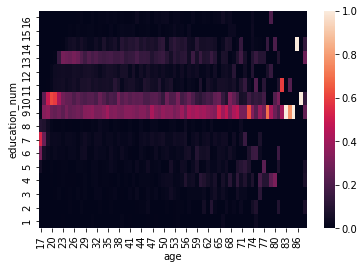

In [8]:
plt = sns.heatmap(heat)

In [11]:
fakefile = io.BytesIO()

In [15]:
plt.savefig(fakefile)